In [2]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.6 MB/s eta 0:00:00a 0:00:01m

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [4]:
df_mnist = pd.read_csv("/Users/danilkazakov/Desktop/Untitled Folder/mnist.csv")
display(df_mnist)

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_data_2d = pd.read_csv("/Users/danilkazakov/Desktop/Untitled Folder/data_2d.csv")
display(df_data_2d)

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482
...,...,...,...
194,1.0,0.629144,4.378584
195,1.0,-0.723824,5.361801
196,1.0,1.346107,2.333476
197,1.0,3.608219,3.411546


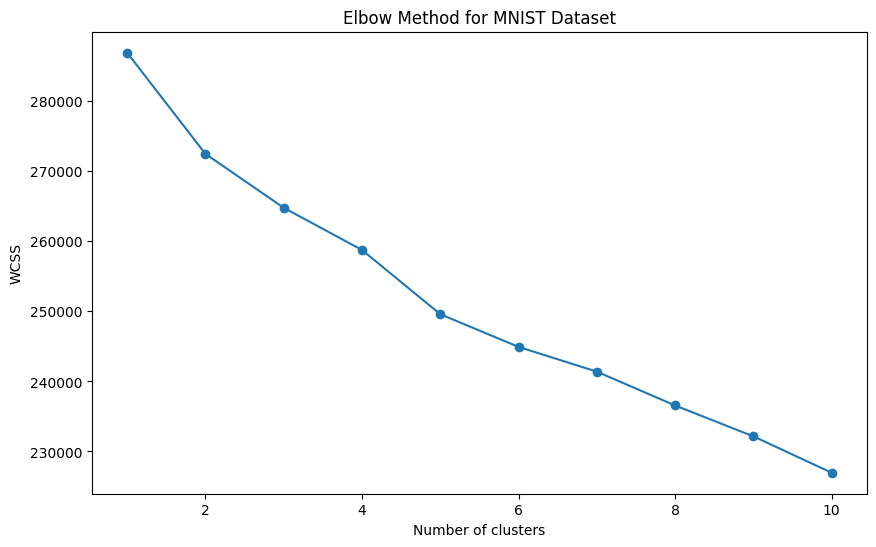

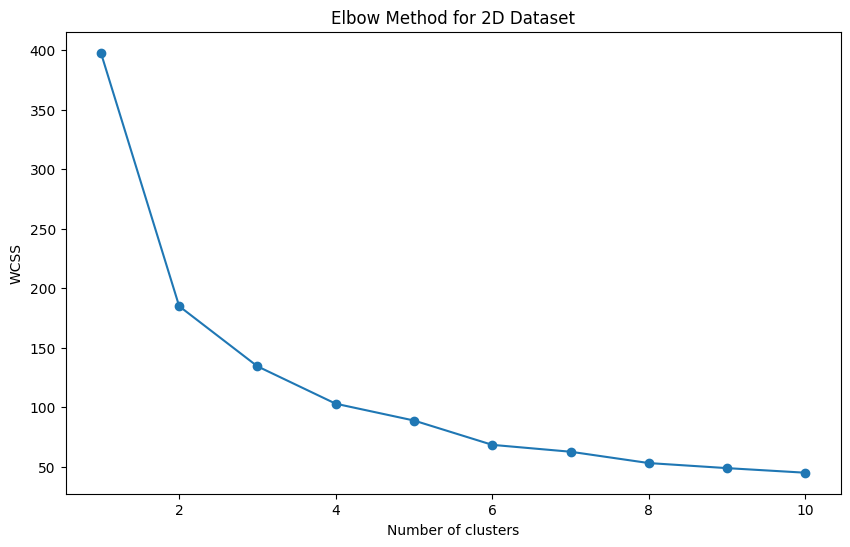


MNIST dataset with clusters:
   7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.659  0.660  0.661  \
0  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.662  0.663  0.664  0.665  0.666  0.667  Cluster  
0      0      0      0      0      0      0        0  
1      0      0      0      0      0      0        2  
2      0      0      0      0      0      0        6  
3      0      0      0      0      0      0        8  
4      0      0      0      0      0      0        2  

[5 rows x 786 columns]

2D dataset with clusters:
   0.000000000000000000e+00  -7.687164597386728637e-01  \
0                       0.0                   2.687848   
1         

In [6]:
X_mnist = df_mnist.iloc[:, 1:]  # Assuming the first column is not useful for clustering

X_data_2d = df_data_2d.iloc[:, 1:]

scaler = StandardScaler()
X_mnist_scaled = scaler.fit_transform(X_mnist)
X_data_2d_scaled = scaler.fit_transform(X_data_2d)

def plot_elbow_method(data, title):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title(f'Elbow Method for {title}')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

plot_elbow_method(X_mnist_scaled, 'MNIST Dataset')
plot_elbow_method(X_data_2d_scaled, '2D Dataset')

kmeans_mnist = KMeans(n_clusters=10, random_state=42)
kmeans_data_2d = KMeans(n_clusters=3, random_state=42)

kmeans_mnist.fit(X_mnist_scaled)
kmeans_data_2d.fit(X_data_2d_scaled)

clusters_mnist = kmeans_mnist.predict(X_mnist_scaled)
clusters_data_2d = kmeans_data_2d.predict(X_data_2d_scaled)

df_mnist['Cluster'] = clusters_mnist
df_data_2d['Cluster'] = clusters_data_2d

print("\nMNIST dataset with clusters:")
print(df_mnist.head())
print("\n2D dataset with clusters:")
print(df_data_2d.head())

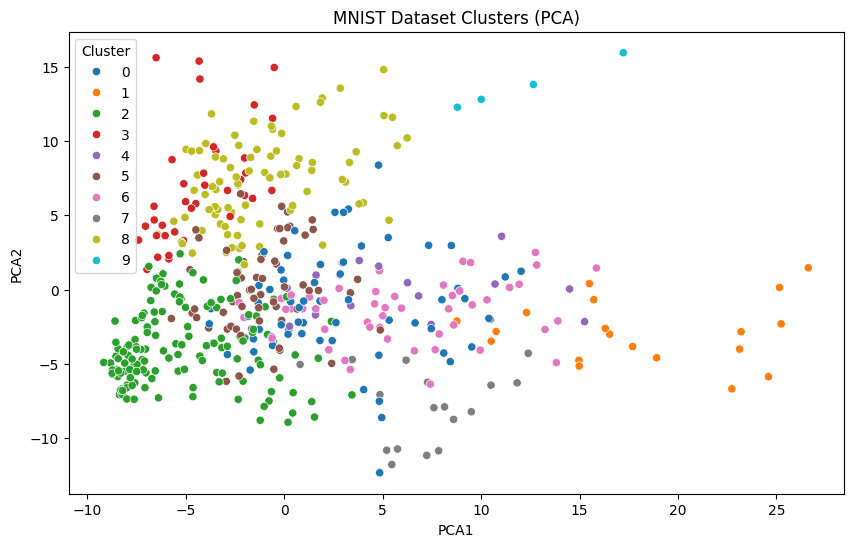

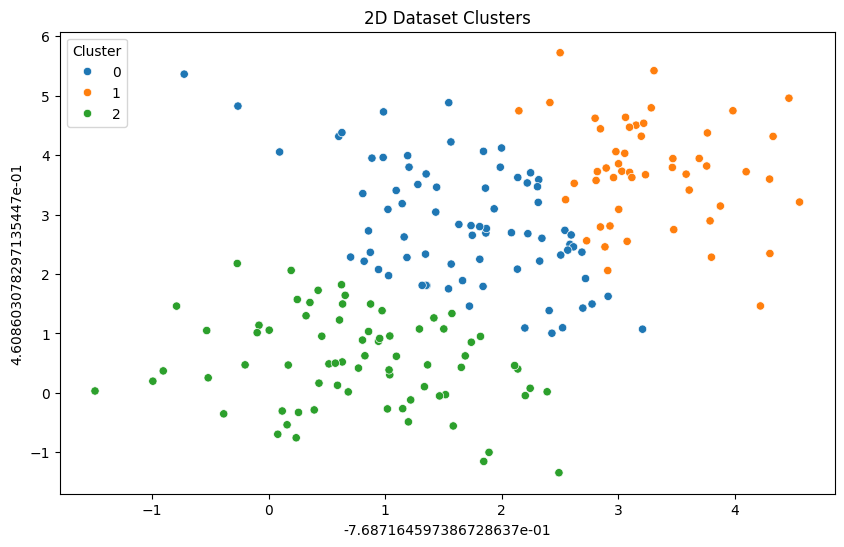

In [7]:
pca = PCA(n_components=2)
mnist_2d = pca.fit_transform(X_mnist_scaled)

df_mnist_2d = pd.DataFrame(mnist_2d, columns=['PCA1', 'PCA2'])
df_mnist_2d['Cluster'] = clusters_mnist

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='tab10', data=df_mnist_2d, legend='full')
plt.title('MNIST Dataset Clusters (PCA)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_data_2d.columns[1], y=df_data_2d.columns[2], hue='Cluster', palette='tab10', data=df_data_2d, legend='full')
plt.title('2D Dataset Clusters')
plt.show()
